# Описание набора данных

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


**Импорт необходимых библиотек**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Чтение набора данных**

In [3]:
df_main = pd.read_csv('car data.csv')

**Отображение нескольких первых строк набора данных**

In [4]:
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Вывод размера набора данных**

In [5]:
df_main.shape

(301, 9)

**Получение общей информации о наборе данных**

In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Получение подробной статистической информации о числовых столбцах в анализируемом наборе данных**

In [7]:
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Замена столбцов, содержащих год производства автомобиля на столбцы, содержащие возраст автомобиля**

In [8]:
df_main['Age'] = 2024 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

**Визуализация частоты появления значений  в столбцах Fuel_Type, Seller_Type, Transmission, Owner**

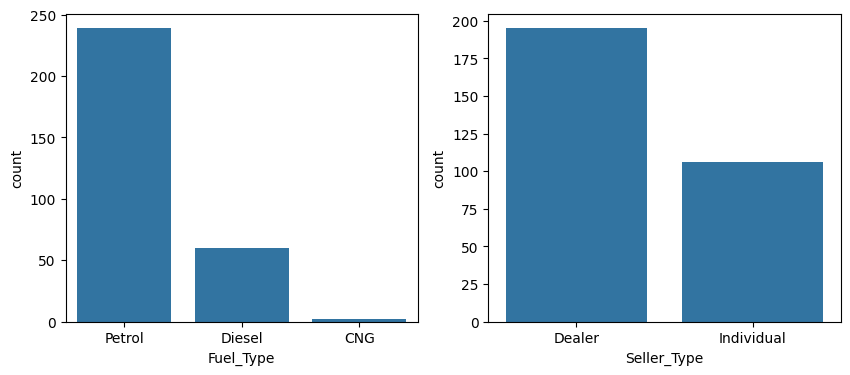

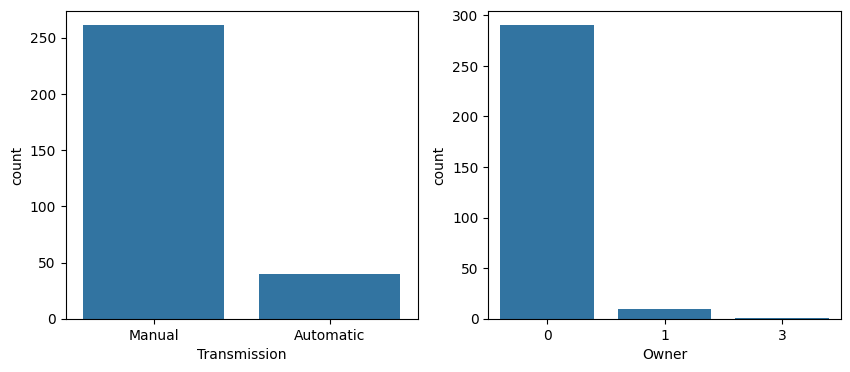

In [9]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.show()

**Визуализация распределения числовых данных в столбцах Selling_Price, Present_Price, Kms_Driven, Age**

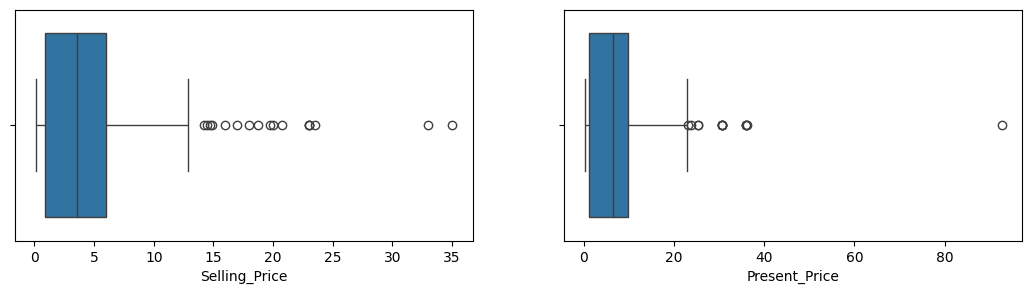

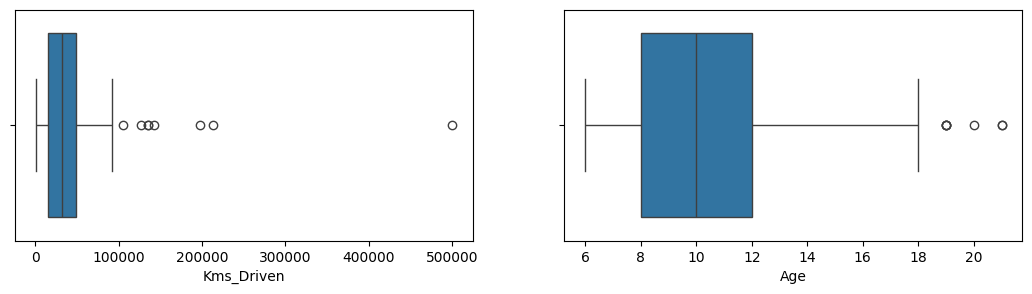

In [10]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1

    plt.show()

Вывод аномально высоких значений столбца Present_Price

In [11]:
df_main[df_main['Present_Price'] > df_main['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


Вывод аномально высоких значений столбца Selling_Price

In [12]:
df_main[df_main['Selling_Price'] > df_main['Selling_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,9
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


Вывод аномально высоких значений столбца Kms_Driven

In [13]:
df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,19
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,14
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,16


Вывод аномально высоких значений столбца Age

In [91]:
df_main[df_main['Age'] > df_main['Age'].quantile(0.99)]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
37,0.35,2.28,127000,0,21,False,True,True,True
39,2.25,7.98,62000,0,21,False,True,False,True
77,1.50,12.35,135154,0,20,False,True,False,False


**Визуализация корреляции числовых столбцов в анализируемом наборе данных**

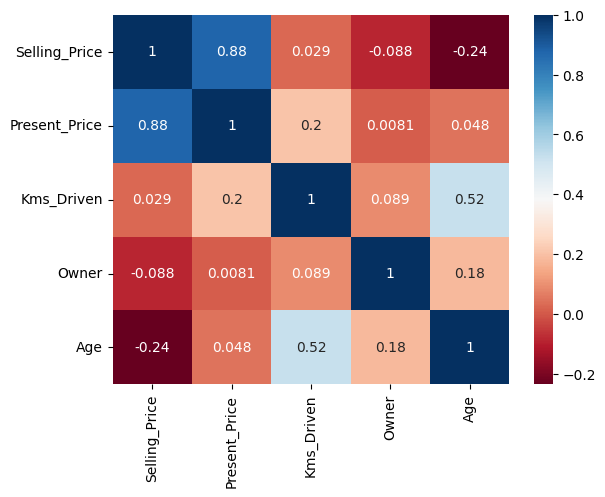

In [14]:
sns.heatmap(df_main.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.show()

# Подготовка набора данных

**Удаление из набора данных столбца, содержащего наименования автомобилей**

In [16]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

Вывод нескольких первых строк полученного набора данных

In [17]:
df_main.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


**Создание фиктивных объектов для категориальных переменных**

In [18]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

Вывод нескольких первых строк полученного набора данных

In [19]:
df_main.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


# Создание и оценка модели

**Импорт необходимой библиотеки**

In [20]:
from sklearn.model_selection import train_test_split

**Разделение целевой переменной и ее функции**

In [22]:
y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

**Разбиение исходного набора данных на обучающий и тестовый наборы**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


**Импорт необходимой библиотеки**

In [83]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

**Реализация функции для обучения, тестирования и оценки модели**

In [88]:
def car_pred_model(model):
    # Обучение модели и тренировка
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # R2 score, MSE и MAPE для обучующего набора данных
    Train_R2_score = r2_score(y_train,y_pred_train)
    Train_MSE = mean_squared_error(y_train,y_pred_train)
    Train_MAPE = mean_absolute_percentage_error(y_train,y_pred_train)

    # R2 score, MSE и MAPE для тестируемого набора данных
    Test_R2_score = r2_score(y_test,y_pred_test)
    Test_MSE = mean_squared_error(y_test,y_pred_test)
    Test_MAPE = mean_absolute_percentage_error(y_test,y_pred_test)

    # Вывод результатов для обучающего набора данных
    print("R2 score для обучующего набора данных:",round(Train_R2_score,2))
    print("MSE для обучующего набора данных:",round(Train_MSE,2))
    print("MAPE для обучующего набора данных:",round(Train_MAPE,2), "\n")

    # Вывод результатов для тестируемого набора данных
    print("R2 score для тестируемого набора данных:",round(Test_R2_score,2))
    print("MSE для тестируемого набора данных:",round(Test_MSE,2))
    print("MAPE для тестируемого набора данных:",round(Test_MAPE,2))

    # Визуализация фактических и спрогнозированных значений
    plt.scatter(x = y_test, y = y_pred_test)
    plt.title('Фактические и спрогнозированные значения')
    plt.plot([0, 20], [0, 20])
    plt.xlabel('Фактические значения')
    plt.ylabel('Спрогнозированные значения')
    plt.show()

**Создание модели**

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14)

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

**Получение прогноза**

R2 score для обучующего набора данных: 0.88
MSE для обучующего набора данных: 3.15
MAPE для обучующего набора данных: 1.12 

R2 score для тестируемого набора данных: 0.86
MSE для тестируемого набора данных: 2.96
MAPE для тестируемого набора данных: 1.27


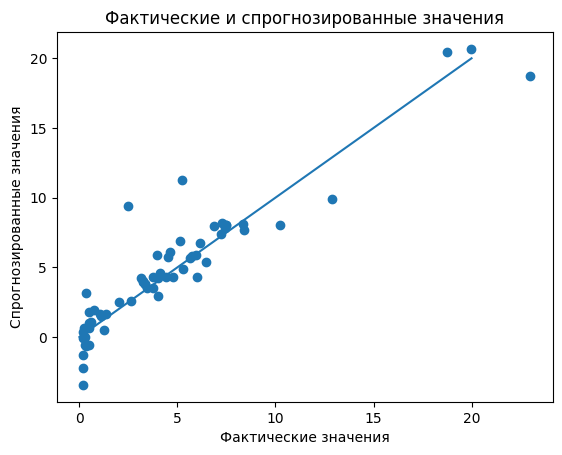

In [90]:
car_pred_model(ls_rs)